<a href="https://colab.research.google.com/github/Raseealmanea/2025_GP_19/blob/main/Ouwn_Model/DataPreprocessing/files/plm_icd_lr5e-5/plm_icd_lr5e_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Model
The second model was trained with a learning rate of 5e-5 for 20 epochs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/medical-coding-reproducibility-main")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installation


In [ ]:

!pip install --no-cache-dir \
  transformers==4.57.1 tokenizers==0.22.1 \
  huggingface-hub==0.36.0 accelerate==1.11.0 safetensors==0.6.2


In [ ]:
import os
os.environ["TRANSFORMERS_NO_QUANT_MODELS"] = "1"  # must be set before importing transformers

from transformers.models.roberta import RobertaTokenizerFast, RobertaModel

PATH = "/content/drive/MyDrive/RoBERTa-base-PM-M3-Voc/RoBERTa-base-PM-M3-Voc-hf"
tok = RobertaTokenizerFast.from_pretrained(PATH, local_files_only=True)
mdl = RobertaModel.from_pretrained(PATH, local_files_only=True)
print("Loaded:", type(tok).__name__, type(mdl).__name__)


Loaded: RobertaTokenizerFast RobertaModel


In [ ]:
!PYTHONPATH=/content/coding_env python -c "import numpy, pandas, torch; \
print('NumPy', numpy.__version__); \
print('Pandas', pandas.__version__); \
print('Torch', torch.__version__); \
print('CUDA', torch.cuda.is_available())"

NumPy 2.0.2
Pandas 2.2.2
Torch 2.8.0+cu126
CUDA True


In [ ]:
%pip install -q --upgrade pip
%pip install -q "pandas>=2.2,<2.3" "pyarrow>=14,<18" "omegaconf==2.3.0" wget


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 160.3 MB/s  0:00:00


In [ ]:
pip install hydra-core --upgrade

In [ ]:
!pip install "hydra-core==1.3.2" "omegaconf==2.3.0" \
             "pytorch-lightning==2.3.3"  \
             "accelerate>=0.31" "datasets>=2.19" "sentencepiece"

In [ ]:
import os
os.environ["TRANSFORMERS_NO_QUANT_MODELS"] = "1"   # keep quantizers out

from transformers.models.roberta import RobertaTokenizerFast, RobertaModel
PATH = "/content/drive/MyDrive/RoBERTa-base-PM-M3-Voc/RoBERTa-base-PM-M3-Voc-hf"

tok = RobertaTokenizerFast.from_pretrained(PATH, local_files_only=True)
mdl = RobertaModel.from_pretrained(PATH, local_files_only=True)
print("OK:", type(tok).__name__, type(mdl).__name__)


OK: RobertaTokenizerFast RobertaModel


In [ ]:
%cd /content/drive/MyDrive/medical-coding-reproducibility-main

/content/drive/MyDrive/medical-coding-reproducibility-main


In [ ]:
!pip install --no-cache-dir -U wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 274.3 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.22.3
    Uninstalling wandb-0.22.3:
      Successfully uninstalled wandb-0.22.3


# Running the experimant

In [ ]:
import os
os.chdir("/content/drive/MyDrive/medical-coding-reproducibility-main")

!python -u main.py \
  experiment=mimiciv_icd10/plm_icd \
  callbacks=defaults \
  trainer.print_metrics=true \
  +trainer.accelerator=gpu \
  +trainer.devices=1


2025-11-16 16:30:05.736627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763310605.758431   36566 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763310605.765059   36566 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763310605.781080   36566 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763310605.781119   36566 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763310605.781123   36566 computation_placer.cc:177] computation placer alr

In [ ]:
import os
os.chdir("/content/drive/MyDrive/medical-coding-reproducibility-main")

# Resume same W&B run
os.environ["WANDB_RESUME"] = "allow"
os.environ["WANDB_RUN_ID"] = "w3sngn4w"

!python -u main.py \
  experiment=mimiciv_icd10/plm_icd \
  gpu=0 \
  callbacks=defaults \
  trainer.print_metrics=true \
  +trainer.accelerator=gpu \
  +trainer.devices=1 \
  trainer.epochs=20 \
  load_model=/content/drive/MyDrive/medical-coding-reproducibility-main/files/w3sngn4w


Traceback (most recent call last):
  File "/content/drive/MyDrive/medical-coding-reproducibility-main/main.py", line 6, in <module>
    import hydra
ModuleNotFoundError: No module named 'hydra'


In [ ]:
!wandb login --relogin


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


# **Outcomes of First Model**

In [ ]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

api = wandb.Api()
run = api.run("raseel25-m-king-saud-university/automatic-medical-coding/w3sngn4w")
df = run.history()


In [ ]:
df = run.history()

train_loss = df["train.all.loss"].dropna()
val_loss = df["val.all.loss"].dropna()

# Match lengths (in case one has more points)
min_len = min(len(train_loss), len(val_loss))
train_loss = train_loss[:min_len]
val_loss = val_loss[:min_len]

epochs = range(1, min_len + 1)


### Training vs Validation Loss
The first model achieved strong classification performance on testing set, with a micro AUC of 0.9784 and a macro AUC of 0.9049, indicating that the model performs well both on frequent and rare ICD codes. As shown in                bargarpn , the training and validation loss curves remain closely aligned throughout the training process, with no noticeable divergence. This behavior suggests stable learning and indicates that the model did not overfit the training data. The small, consistent gap between the two curves confirms good generalization to unseen validation samples.

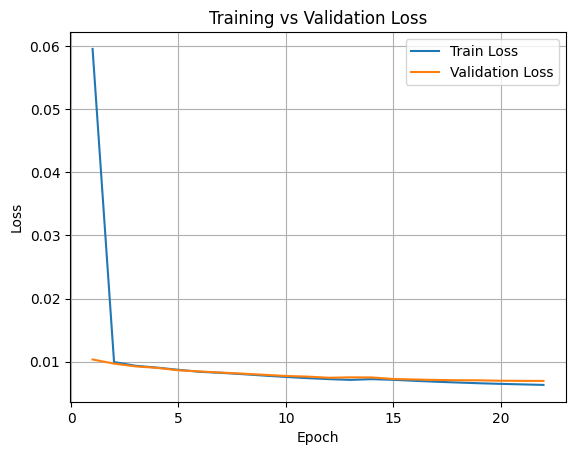

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


### Micro F1 for all, Procedure, and Diagnosis in the Testing
As presents the Micro F1 scores for the all, diagnosis, and procedure label groups across the training, validation, and testing sets. The scores across the three splits are closely aligned, indicating stable learning behavior and good generalization. In this context, the “all” label group represents the complete set of ICD-10 codes, combining both diagnosis and procedure labels. The other two groups isolate each category independently, allowing a clearer view of the model’s performance on each type of code. In the training set, the Micro F1 scores are slightly lower, which is expected since the model is still optimizing its parameters. The validation set shows slightly higher and consistent scores, suggesting that the model generalizes well beyond the training data. The testing set demonstrates performance very similar to the validation set, confirming that the model maintains its effectiveness when evaluated on completely unseen data.

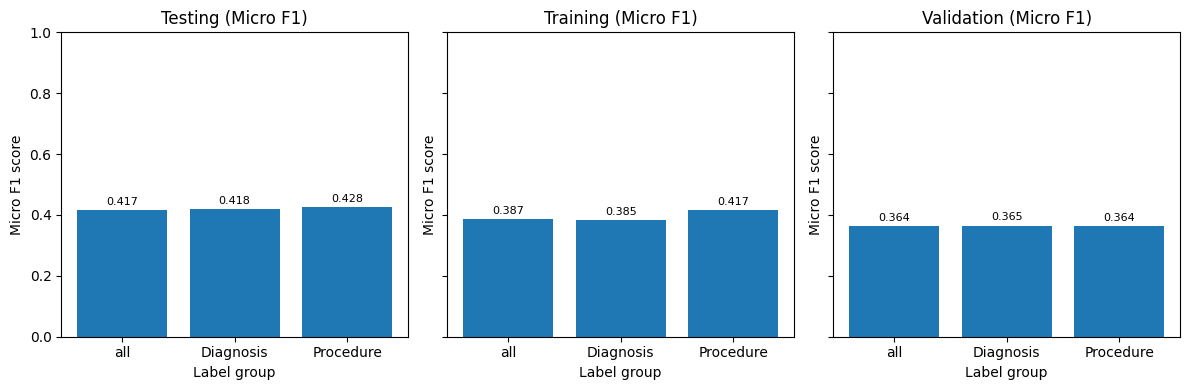

In [1]:
 import matplotlib.pyplot as plt

# 1) Testing – Micro F1
test_micro_f1 = {
    "all": 0.41732558608055115,
    "Diagnosis": 0.4184267818927765,
    "Procedure": 0.427588164806366,
}

# 2) Training – Micro F1
train_micro_f1 = {
    "all": 0.387316137552261357,
    "Diagnosis": 0.3847983479499817,
    "Procedure": 0.41735416650772095,
}

# 3) Validation – Micro F1
val_micro_f1 = {
    "all": 0.3644934892654419,
    "Diagnosis": 0.365306168794632,
    "Procedure": 0.36416980624198914,
}

splits = {
    "Testing (Micro F1)": test_micro_f1,
    "Training (Micro F1)": train_micro_f1,
    "Validation (Micro F1)": val_micro_f1,
}

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, (title, scores) in zip(axes, splits.items()):
    x = list(scores.keys())
    y = list(scores.values())
    bars = ax.bar(x, y)

    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.set_xlabel("Label group")
    ax.set_ylabel("Micro F1 score")

    # Add value on top of each bar
    for bar, value in zip(bars, y):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{value:.3f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

plt.tight_layout()
plt.show()


### Macro F1 for all, Diagnosis, and Procedure across Splits
It presents the Macro F1 scores for the all, diagnosis, and procedure label groups across the training, validation, and testing sets. As expected in large multi-label medical coding datasets, the macro scores are significantly lower than the micro scores due to the extreme imbalance across ICD-10 codes. The procedure labels consistently achieve higher macro F1 compared to diagnosis and all labels, indicating that the model performs better on procedure codes, which tend to be fewer and less diverse. The validation split shows the lowest macro values, reflecting the difficulty of predicting rare ICD codes when each label contributes equally to the metric. Overall, the macro F1 results highlight the challenge of balanced performance across all ICD codes but remain consistent with typical outcomes in automatic medical coding research.

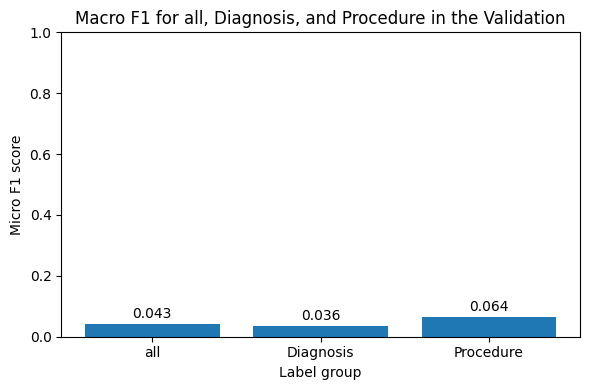

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual micro-F1 values
micro_f1 = {
    "all":0.04315294325351715,
    "Diagnosis":0.03625286743044853,
    "Procedure":0.06359764188528061,
}

x = list(micro_f1.keys())      # ['all', 'diag', 'proc']
y = list(micro_f1.values())    # micro F1 values

plt.figure(figsize=(6,4))
bars = plt.bar(x, y)

plt.ylim(0, 1)  # micro-F1 is between 0 and 1
plt.xlabel("Label group")
plt.ylabel("Micro F1 score")
plt.title("Macro F1 for all, Diagnosis, and Procedure in the Validation")

# Show value above each bar
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.01,
             f"{value:.3f}",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()


### Precision@k for all, diagnosis, and procedure across splits
The precision@k results shown in graph Reference source not found. for the all, diagnosis, and procedure label groups across the train-validation, validation, and testing sets show consistent and stable model behavior. Across all splits, precision decreases gradually as k increases from 5 to 15, which is expected because the model must predict more labels at larger k-values. The diagnosis category consistently achieves slightly higher precision than the all group, while the procedure category shows lower precision across all k-values. This pattern reflects the inherent difficulty of predicting procedure codes, which are typically more sparse and diverse compared to diagnosis codes. Importantly, the validation and testing precision values closely match each other, demonstrating that the model generalizes well and does not suffer from overfitting. The similarity between the train-validation and validation scores further indicates stable learning and balanced performance across different subsets of the data.

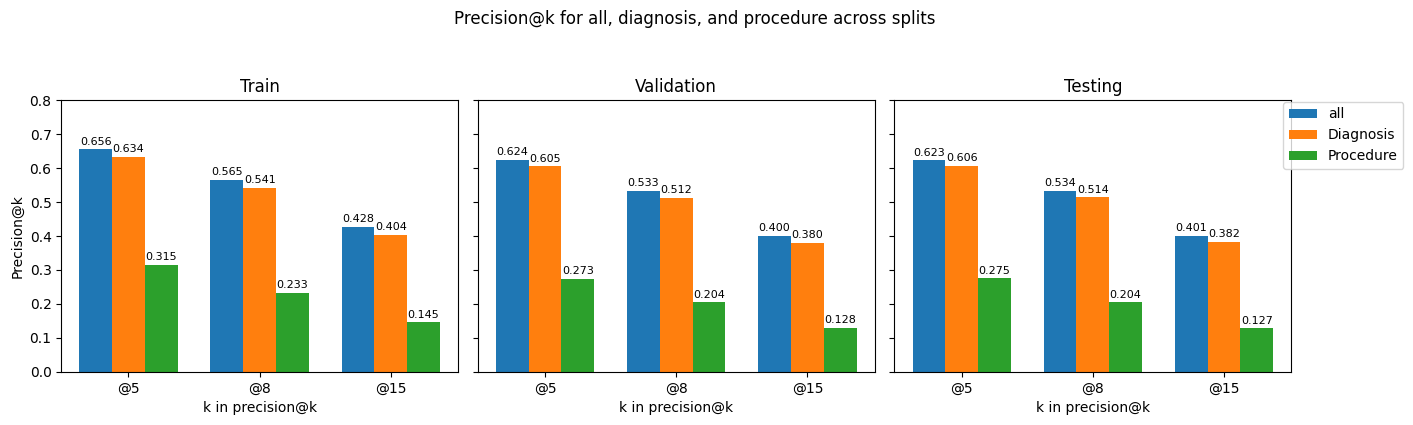

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_vals = [5, 8, 15]
x = np.arange(len(k_vals))  # positions: [0,1,2]
width = 0.25                # bar width

# ==== FILL YOUR METRICS HERE ====
train_val = {
    "all":  [0.6555167818, 0.5647091269, 0.4278344214],
    "diag": [0.6340894699, 0.5411619544, 0.4038173556],
    "proc": [0.3154319227, 0.2331476808, 0.1454895288],
}

val = {
    "all":  [0.6235742569, 0.5325433016, 0.3997413814],
    "diag": [0.6052899957, 0.5124037862, 0.3804854751],
    "proc": [0.2732383907, 0.2040759772, 0.1284574121],
}

test = {
    "all":  [0.6232620478, 0.5341460109, 0.4011219442],
    "diag": [0.6059860587, 0.5141996741, 0.3816255927],
    "proc": [0.2752673924, 0.2040653527, 0.1274673641],
}

splits = [("Train", train_val),
          ("Validation", val),
          ("Testing", test)]

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

for ax, (title, metrics) in zip(axes, splits):
    ax.bar(x - width, metrics["all"],  width, label="all")
    ax.bar(x,         metrics["diag"], width, label="Diagnosis")
    ax.bar(x + width, metrics["proc"], width, label="Procedure")

    ax.set_xticks(x)
    ax.set_xticklabels([f"@{k}" for k in k_vals])
    ax.set_xlabel("k in precision@k")
    ax.set_title(title)
    ax.set_ylim(0, 0.8)

    # add value labels on top of bars
    for bars in ax.containers:
        ax.bar_label(bars, fmt="%.3f", fontsize=8, padding=2)

axes[0].set_ylabel("Precision@k")
axes[-1].legend(loc="upper right", bbox_to_anchor=(1.3, 1.02))
fig.suptitle("Precision@k for all, diagnosis, and procedure across splits", y=1.05)
fig.tight_layout()
plt.show()


### Recall@k for all, diagnosis, and procedure across splits
The Recall@10 and Recall@15 graphs illustrate in the graph  which represent how well the model retrieves the correct ICD codes among its top-k predictions across the training, validation, and testing sets. Overall, the model performs consistently across all splits, showing stable generalization. Diagnosis codes achieve moderate recall, while procedure codes consistently reach very high recall values—over 0.72 at k=10 and above 0.78 at k=15—indicating that procedure labels are easier for the model to identify. The “All” category, which combines both code types, falls between the two. The improvement from k=10 to k=15 across all groups confirms that increasing the number of allowed predictions helps the model capture more relevant codes, improving retrieval performance.

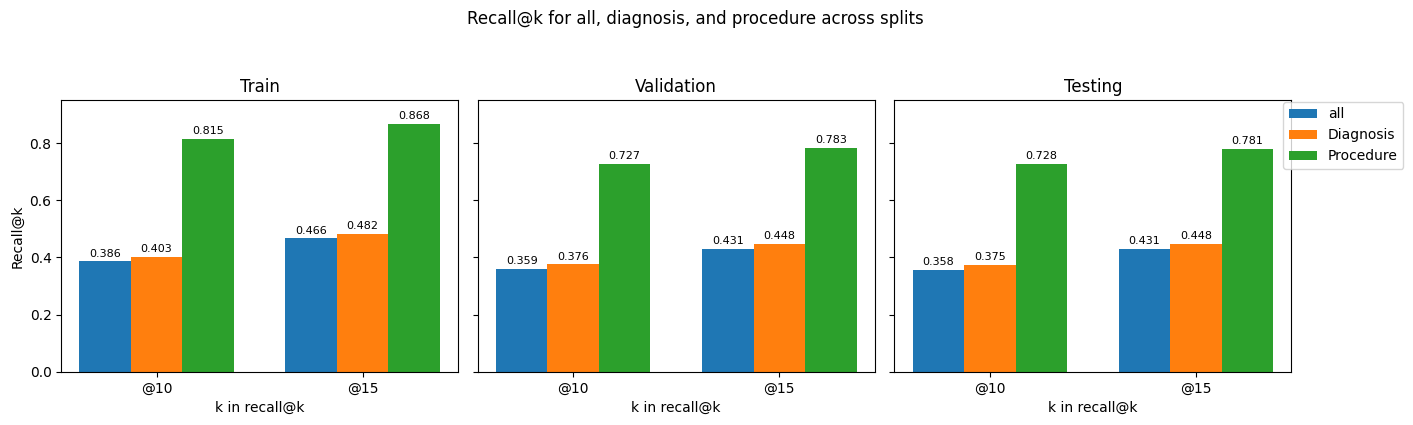

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# k = 10, 15
k_vals = [10, 15]
x = np.arange(len(k_vals))   # [0, 1]
width = 0.25                 # bar width

# ===== Recall@k values =====
train_val = {
    "all":  [0.38602674, 0.46641451],
    "diag": [0.40317196, 0.48216027],
    "proc": [0.81477999, 0.86814719],
}

val = {
    "all":  [0.35883462, 0.43091035],
    "diag": [0.37607756, 0.44792476],
    "proc": [0.72710985, 0.78319263],
}

test = {
    "all":  [0.35780585, 0.43059969],
    "diag": [0.37495372, 0.44771937],
    "proc": [0.72762054, 0.78116775],
}

splits = [("Train", train_val),
          ("Validation", val),
          ("Testing", test)]

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

for ax, (title, metrics) in zip(axes, splits):
    ax.bar(x - width, metrics["all"],  width, label="all")
    ax.bar(x,         metrics["diag"], width, label="Diagnosis")
    ax.bar(x + width, metrics["proc"], width, label="Procedure")

    ax.set_xticks(x)
    ax.set_xticklabels([f"@{k}" for k in k_vals])
    ax.set_xlabel("k in recall@k")
    ax.set_title(title)
    ax.set_ylim(0, 0.95)

    # value labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt="%.3f", fontsize=8, padding=2)

axes[0].set_ylabel("Recall@k")
axes[-1].legend(loc="upper right", bbox_to_anchor=(1.3, 1.02))
fig.suptitle("Recall@k for all, diagnosis, and procedure across splits", y=1.05)
fig.tight_layout()
plt.show()
